Vamos a usar la librería `math`, que define funciones elementales y constantes como $\pi$, y la librería `matplotlib` para generar una gráfica para visualizar nuestra función error. 

In [14]:
import math as math
import matplotlib.pyplot as plt
Pi = math.pi

Ahora, definimos el error relativo y absoluto para nuestro ejemplo de la aproximación $\sin(\theta) \approx \theta$:

In [41]:
def ea(theta):
    return  math.fabs(math.sin(theta) - theta)

def er(theta):
    return  math.fabs(ea(theta)/math.sin(theta) )



Vamos a tomar cien valores de ángulos entre $0$ y $2\pi$, y a calcular los errores para cada uno de ellos:

In [55]:
N = 1000
theta_list = [3*Pi*x/N for x in range(1,N)]
ea_list = [ea(3*Pi*x/N) for x in range(1,N)]
er_list = [er(3*Pi*x/N) for x in range(1,N)]


Graficamos el error absoluto

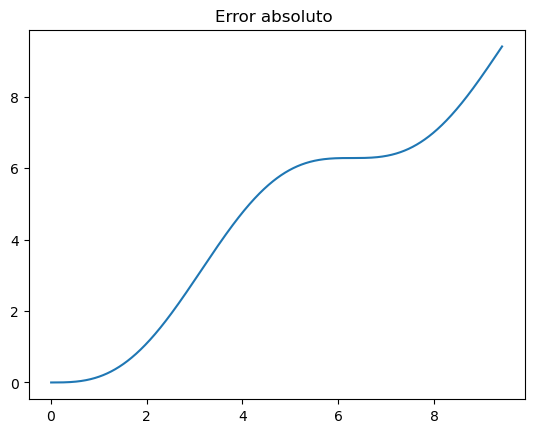

In [59]:
plt.plot(theta_list, ea_list)
plt.title('Error absoluto ')
plt.show()

Así como el error relativo

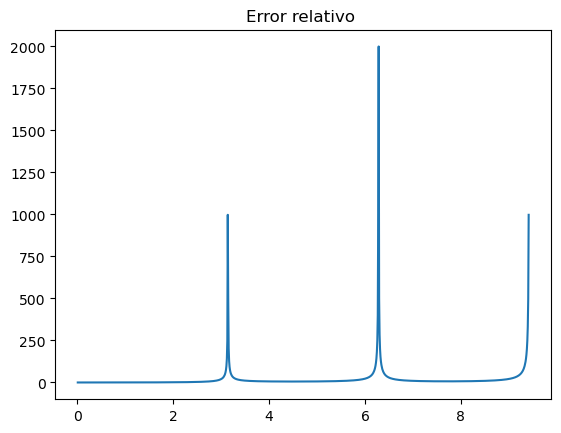

In [60]:
plt.plot(theta_list, er_list)
plt.title('Error relativo ')
plt.show()

Miremos el error de representación

In [82]:
a = 0.1
a

0.1

In [83]:

format(a,'.34f')

'0.1000000000000000055511151231257827'

In [88]:

total = 0.0
for i in range(10):
    total += 0.1
print(f"Expected Result: 1.0\nActual Result: {total}")


Expected Result: 1.0
Actual Result: 0.9999999999999999


Vamos a ejemplificar la acumulación de errores en cálculos con punto flotante

In [85]:
def iternum(n):
    result = 1
    
    for i in range(n):
        result += 1/3

    for i in range(n):
        result -= 1/3
    return result

iternum(10000)



1.0000000000001166

In [86]:

format(iternum(100000000), '.30f')

'1.000000000496402252636585217260'